<a href="https://colab.research.google.com/github/kasu712/Machine-learning-/blob/main/crime_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('/content/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [ ]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


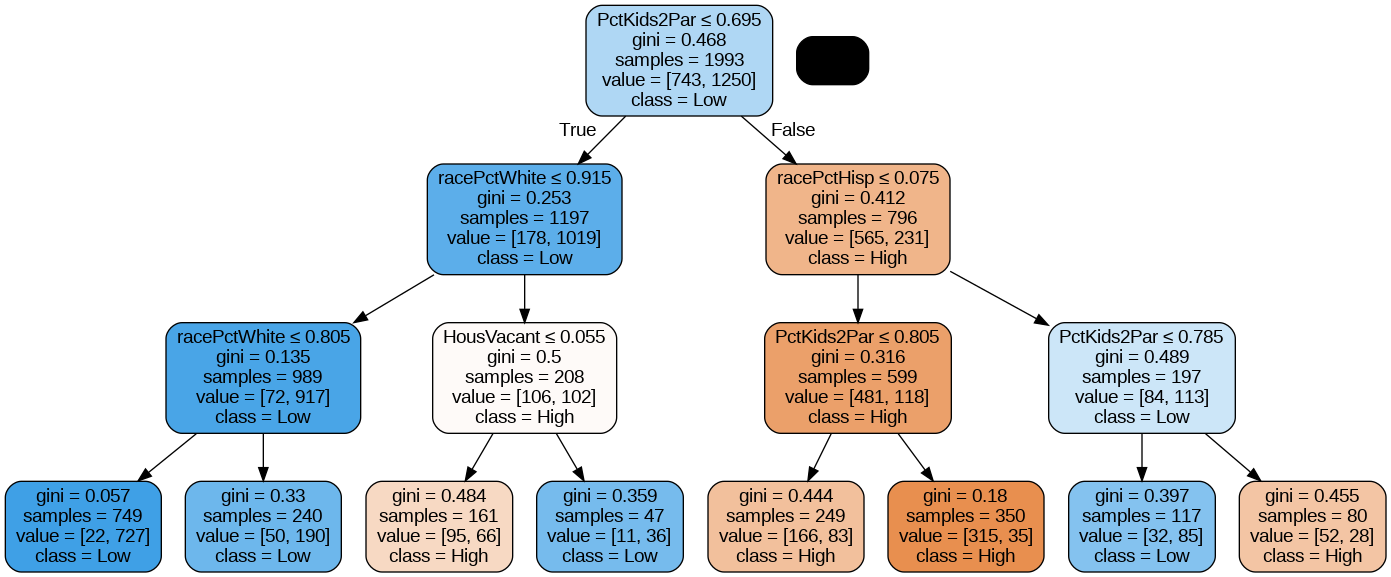

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', axis=1) # Fix: Specify axis for column drop
initial = initial.drop('ViolentCrimesPerPop', axis=1) # Fix: Specify axis for column drop
initial = initial.drop('fold', axis=1) # Fix: Specify axis for column drop

initial = initial.drop('state', axis=1) # Fix: Specify axis for column drop
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
import pydotplus
from IPython.display import Image
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(initial),
                         class_names=classname,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import cross_val_score
#fold=df['fold']  # Remove this line, cross_val_score handles splitting internally
scores = cross_val_score(clf, initial, Y, cv=10, scoring='accuracy')  # Use cv parameter for number of folds, scoring for metric
print('cross_val_accuracy is ',scores)
print('cross_val_accuracy_avg is ',np.array(scores).mean())
scores = cross_val_score(clf, initial, Y, cv=10, scoring='precision')
print('cross_val_precision is ',scores)
print('cross_val_precision_avg is ',np.array(scores).mean())
scores = cross_val_score(clf, initial, Y, cv=10, scoring='recall')
print('cross_val_recall is ',scores)
print('cross_val_recall_avg is ',np.array(scores).mean())

cross_val_accuracy is  [0.79       0.875      0.83       0.84924623 0.65326633 0.75879397
 0.84924623 0.7839196  0.79396985 0.79899497]
cross_val_accuracy_avg is  0.7982437185929648
cross_val_precision is  [0.78231293 0.85211268 0.84210526 0.88       0.75454545 0.88118812
 0.85185185 0.94565217 0.79166667 0.85123967]
cross_val_precision_avg is  0.8432674799594686
cross_val_recall is  [0.92  0.968 0.896 0.88  0.664 0.712 0.92  0.696 0.912 0.824]
cross_val_recall_avg is  0.8392


In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


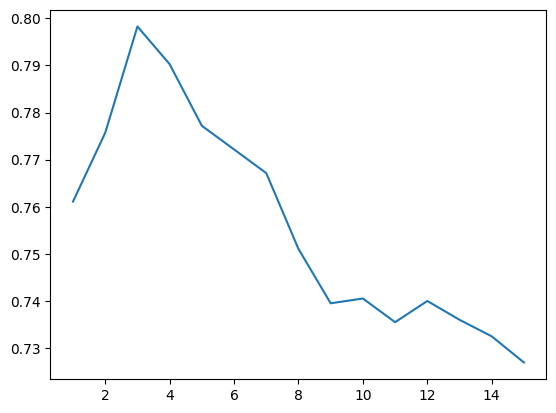

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.790246231155779, 0.777180904522613, 0.7721683417085428, 0.7671457286432161, 0.7510628140703517, 0.739537688442211, 0.7405502512562815, 0.7355301507537688, 0.7400301507537689, 0.7360402010050251, 0.7325276381909548, 0.7269849246231156]


In [ ]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    #The arguments None and 'accuracy' should be keyword arguments.
    scores = cross_val_score(clf, initial, Y, cv=10, scoring='accuracy') # Fixed: Use keyword arguments for cv and scoring
    y.append(np.array(scores).mean())
    x.append(i)


plt.plot(x, y)

plt.show()

print('',y)

In [ ]:
feature_selection = clf.feature_importances_


ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [29  5  3 44]
4_max_normalized_feature is  [0.02082369 0.05116043 0.08646058 0.3620976 ]
29
feature_name[index] is  PctLess9thGrade
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


In [ ]:
#NaiveBayes-Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
# Use 'var_' instead of 'sigma_'
variance=gnb.var_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])





from sklearn.model_selection import cross_val_score
# Use an integer to specify the number of folds for cross-validation
scores = cross_val_score(gnb, initial, Y, cv=10, scoring='accuracy')
print('cross_val_accuracy is ',scores)
print('cross_val_accuracy_avg is ',np.array(scores).mean())
scores = cross_val_score(gnb, initial, Y, cv=10, scoring='precision')
print('cross_val_precision is ',scores)
print('cross_val_precision_avg is ',np.array(scores).mean())
scores = cross_val_score(gnb, initial, Y, cv=10, scoring='recall')
print('cross_val_recall is ',scores)
print('cross_val_recall_avg is ',np.array(scores).mean())

mislabel num is  442
ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv
cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.7

In [ ]:
#linear svc
from sklearn import svm
lin_svc = svm.LinearSVC(C=0.01447, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
print("",feature_weight)
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i], ' feature_weight is ', feature_weight[i])



from sklearn.model_selection import cross_val_score, KFold
# Use KFold for cross-validation since 'fold' is not an iterable of splits
cv_strategy = KFold(n_splits=10)
scores = cross_val_score(lin_svc, initial, Y, cv=cv_strategy, scoring='accuracy')
print('cross_val_accuracy is ',scores)
print('cross_val_accuracy_avg is ',np.array(scores).mean())
scores = cross_val_score(lin_svc, initial, Y, cv=cv_strategy, scoring='precision')
print('cross_val_precision is ',scores)
print('cross_val_precision_avg is ',np.array(scores).mean())
scores = cross_val_score(lin_svc, initial, Y, cv=cv_strategy, scoring='recall')
print('cross_val_recall is ',scores)
print('cross_val_recall_avg is ',np.array(scores).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 [0.         0.         0.14514114 0.6043011  0.         0.42078497
 0.         0.         0.         0.         0.         0.08646816
 0.         0.         0.         0.03913806 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08768341 1.52075913
 0.         0.         0.56740959 0.         0.         0.
 0.         0.         0.35639336 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.19450478 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

cross_val_accuracy is  [0.86       0.89       0.905      0.72864322 0.72361809 0.81909548
 0.81407035 0.79396985 0.85427136 0.76884422]
cross_val_accuracy_avg is  0.815751256281407


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

cross_val_precision is  [0.88636364 0.93567251 0.96153846 0.80672269 0.79761905 0.80898876
 0.79230769 0.76767677 0.90322581 0.69421488]
cross_val_precision_avg is  0.8354330255730733


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

cross_val_recall is  [0.94545455 0.93023256 0.92086331 0.7480315  0.63809524 0.75824176
 0.92035398 0.8172043  0.92156863 0.91304348]
cross_val_recall_avg is  0.8513089294434592


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler # Import StandardScaler for data normalization

# Create a StandardScaler object to normalize the data
scaler = StandardScaler()

# Normalize the features in 'initial'
initial_normalized = scaler.fit_transform(initial)

lr = linear_model.LinearRegression() # Remove normalize parameter
Y = df['ViolentCrimesPerPop']
# Use normalized data for cross-validation
predicted = cross_val_predict(lr, initial_normalized, Y, cv=10)
print('10_fold_cv_MSE is ',mean_squared_error(Y, predicted))

# Fit the model using normalized data
y_pred = lr.fit(initial_normalized, Y).predict(initial_normalized)

print('MSE on training set is ',mean_squared_error(Y, y_pred))

# ... rest of your code ...

10_fold_cv_MSE is  0.020102698466732367
MSE on training set is  0.01651677488030718


In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# Using RidgeCV to reduce the amount of verfitting
ridge_model = RidgeCV(alphas=[10.0,1.0,0.1, 0.01, 0.001])
print(ridge_model)
ridge_reg_score = cross_val_predict(ridge_model, initial, Y, cv=10)
ridge_fit = ridge_model.fit(initial, Y)
#To get the best alpha
print('Best Alpha: ', ridge_model.alpha_)
ridge_predict = ridge_model.predict(initial)
#accuracy of each Fold
print(ridge_reg_score)
#mean accuracy of 10 Folds
print(ridge_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is: ',mean_squared_error(Y, ridge_reg_score))

#MSE on the Training set
mse_ridge = np.mean((ridge_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_ridge)

RidgeCV(alphas=[10.0, 1.0, 0.1, 0.01, 0.001])
Best Alpha:  1.0
[0.15629536 0.29723509 0.52328122 ... 0.09344901 0.16300833 0.16714695]
0.2370824211039683
10_fold_cv_MSE is:  0.019803952528774264
Mean Square Error on training set:  0.01676352915516942


In [ ]:
#Polynomial Regression
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pol = PolynomialFeatures(degree = 2)
print(pol)

lin_reg = LinearRegression()
pip = Pipeline([("polynomial Feature", pol),("linear_Regression", lin_reg)])
poly_reg_score = cross_val_predict(pip, initial, Y, cv=10)
p_fit = pip.fit(initial, Y)
p_predict = pip.predict(initial)
#accuracy of each fold
print(poly_reg_score)
#mean accuracy of 10 Folds
print(poly_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is ',mean_squared_error(Y, poly_reg_score))

#MSE on Training Set
mse_poly = np.mean((p_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_poly)

PolynomialFeatures()
[ 0.54688961  0.53206735  0.32258408 ... -0.19224814  0.17291609
  0.40110338]
0.2357231858576177
10_fold_cv_MSE is  0.12995722068132406
Mean Square Error on training set:  5.788750326264606e-29


In [ ]:
#Dirty Data
df=pd.read_csv('/content/communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']

# print('total len is ',len(Y))
initial=pd.read_csv('/content/communities-crime-full.csv')
initial = initial.drop('communityname', axis=1) # Use axis=1 to specify column
initial = initial.drop('ViolentCrimesPerPop', axis=1)
initial = initial.drop('fold', axis=1)
initial = initial.drop('state', axis=1)
initial = initial.drop('community', axis=1)
initial = initial.drop('county', axis=1)

feature_name=list(initial)
# Use to_numeric to convert object columns to numeric
for col in initial.columns:
    if initial[col].dtype == 'object':
        initial[col] = pd.to_numeric(initial[col], errors='coerce') # Use errors='coerce' to handle non-numeric values

New_data=initial.fillna(initial.mean())
# print('before...')
# print(initial)
# print('after...')
# print(New_data)
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(New_data, Y)
clf
# Removed the fold argument - cross_val_score handles splitting internally
scores = cross_val_score(clf, New_data, Y, cv=10, scoring='accuracy')
print('cross_val_accuracy is ',scores)
print('cross_val_accuracy_avg is ',np.array(scores).mean())
scores = cross_val_score(clf, New_data, Y, cv=10, scoring='precision')
print('cross_val_precision is ',scores)
print('cross_val_precision_avg is ',np.array(scores).mean())
scores = cross_val_score(clf, New_data, Y, cv=10, scoring='recall')
print('cross_val_recall is ',scores)
print('cross_val_recall_avg is ',np.array(scores).mean())

cross_val_accuracy is  [0.81       0.825      0.805      0.8        0.82914573 0.77386935
 0.85427136 0.83417085 0.80904523 0.8040201 ]
cross_val_accuracy_avg is  0.8144522613065327
cross_val_precision is  [0.90740741 0.86290323 0.84677419 0.84       0.85826772 0.85714286
 0.92105263 0.92592593 0.85950413 0.90566038]
cross_val_precision_avg is  0.8784638467535306
cross_val_recall is  [0.77777778 0.856      0.84       0.84       0.872      0.768
 0.84       0.8        0.832      0.768     ]
cross_val_recall_avg is  0.8193777777777778


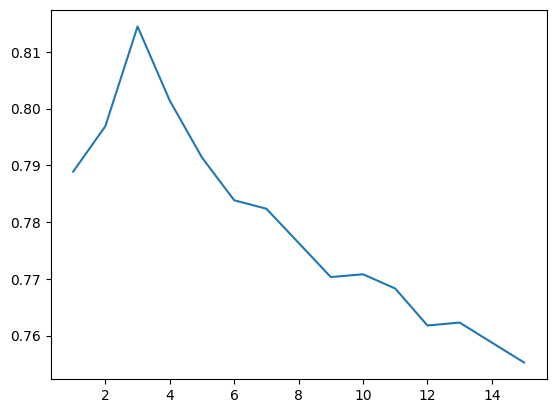

y is  [0.7888693467336685, 0.7968844221105529, 0.8144522613065327, 0.8013869346733667, 0.7913618090452261, 0.7838316582914573, 0.7823391959798995, 0.7763316582914573, 0.7702989949748744, 0.7707939698492463, 0.7682864321608041, 0.7617688442211055, 0.7622814070351759, 0.7587537688442211, 0.7552512562814071]


In [ ]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(New_data, Y)
    y_pred = clf.predict(New_data)
    # Pass scoring as a keyword argument
    scores = cross_val_score(clf, New_data, Y, scoring='accuracy', cv=10)
    y.append(np.array(scores).mean())
    x.append(i)


plt.plot(x, y)

plt.show()
print('y is ',y)

In [ ]:
feature_selection = clf.feature_importances_


ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [29  5  3 44]
4_max_normalized_feature is  [0.02053941 0.04510665 0.08883594 0.3598686 ]
29
feature_name[index] is  PctLess9thGrade
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


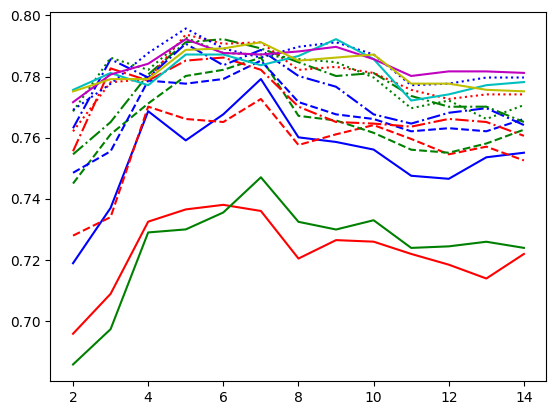

In [ ]:
#PCA&K-NN
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('/content/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('/content/communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
# Use axis as a keyword argument
initial = initial.drop('fold', axis=1)
initial = initial.drop('state', axis=1)
initial = initial.drop('communityname', axis=1)
initial = initial.drop('ViolentCrimesPerPop', axis=1)

x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn, pcdf, Y, cv=10, scoring='accuracy')  # Use cv and scoring as keyword arguments
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [ ]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_

array([[-2.04052546e-02,  9.75132690e-03, -1.28371329e-01,
         1.23044608e-01,  6.52084194e-02, -6.14280591e-02,
        -4.72820587e-02, -4.60121765e-02, -4.71777648e-02,
        -3.46626378e-02, -1.56537431e-02,  1.52570830e-01,
         1.88492101e-01,  1.03286139e-01, -7.18548440e-03,
         1.48691465e-01, -6.12543207e-02, -1.73401439e-01,
         4.48956257e-03,  1.79662679e-01,  1.61193740e-01,
         1.40327609e-01,  1.07194806e-01,  4.39239209e-02,
         8.19922061e-02,  7.74816512e-02,  1.13058167e-01,
        -3.97531389e-02, -1.91357751e-01, -1.50661446e-01,
        -1.59431939e-01,  1.42844505e-01, -1.52692314e-01,
         1.10214847e-01, -2.33208904e-02,  1.61083945e-02,
        -1.34972468e-01,  1.35500286e-01, -1.06437345e-01,
        -4.01754009e-02, -1.01677202e-01, -1.09737150e-01,
        -1.29668589e-02,  1.62749424e-01,  1.68736871e-01,
         1.78676474e-01,  1.33751535e-01, -1.18987095e-02,
         1.12613743e-02, -3.11151955e-02, -1.50870947e-0

In [ ]:
pca.explained_variance_ratio_

array([0.26753256, 0.1879639 , 0.08245766, 0.07097958, 0.04612133])

In [ ]:
pcdf = pca.transform(initial)
pcdf

array([[ 0.42940989, -0.53929962,  0.31031454,  0.61492898, -0.78039979],
       [-1.19933196, -0.90092286,  0.31801595,  0.06578603,  0.08519022],
       [-1.25540273, -0.45223119, -0.37326946, -0.57765159, -0.3419187 ],
       ...,
       [-0.39828125, -0.04847062, -0.72054899,  1.84903701,  0.50341969],
       [-0.06739216, -0.87415147,  0.57794266,  0.14245358, -0.03894169],
       [-0.53794345, -0.94270676, -0.04992509,  0.22885676,  0.51676027]])

In [ ]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141215
Accuracy is 84.14450577019569
Precision is 89.3760539629005
Recall is 84.8


In [ ]:
from sklearn.model_selection import cross_val_score, KFold # Import KFold

# Assuming you want to use 10-fold cross-validation
fold = KFold(n_splits=10, shuffle=True, random_state=42)  # Initialize KFold

scores = cross_val_score(knn, pcdf, Y, cv=fold, scoring='accuracy')  # Use keyword arguments
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn, pcdf, Y, cv=fold, scoring='precision')
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn, pcdf, Y, cv=fold, scoring='recall')
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 80.78090452261307
Cross validation precision is 86.19222421607856
Cross validation recall is 82.5721276970623


In [ ]:
feature_name=list(initial)

ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('vector_component[index] is ',feature_name[index])

ind is  [83 84 80 19 45 44 81 82 85 12]
10_max_vector_components is  [0.16356539 0.19320424 0.16436957 0.17966268 0.17867647 0.16873687
 0.16398596 0.16706879 0.16710099 0.1884921 ]
83
vector_component[index] is  RentMedian
84
vector_component[index] is  RentHighQ
80
vector_component[index] is  OwnOccMedVal
19
vector_component[index] is  medFamInc
45
vector_component[index] is  PctYoungKids2Par
44
vector_component[index] is  PctKids2Par
81
vector_component[index] is  OwnOccHiQuart
82
vector_component[index] is  RentLowQ
85
vector_component[index] is  MedRent
12
vector_component[index] is  medIncome


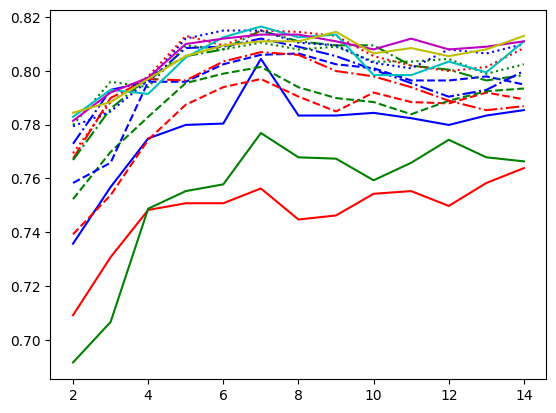

In [ ]:
df=pd.read_csv('/content/communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
# Use KFold to create an iterable for cross-validation
fold = KFold(n_splits=10, shuffle=True, random_state=42)
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(New_data)
    pcdf = pca.transform(New_data)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        # Now 'fold' is a KFold object, suitable for cross_val_score
        scores = cross_val_score(knn, pcdf, Y, cv=fold, scoring='accuracy')
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [ ]:
pca = PCA(n_components=5)
pca.fit(New_data)
pca.components_

array([[-2.05868501e-02,  9.75819911e-03, -1.29180835e-01,
         1.23575532e-01,  6.51854595e-02, -6.12052661e-02,
        -4.71845615e-02, -4.58094979e-02, -4.69925869e-02,
        -3.46798200e-02, -1.58243934e-02,  1.52668790e-01,
         1.88267648e-01,  1.03334631e-01, -7.14474897e-03,
         1.48575631e-01, -6.12402679e-02, -1.73533941e-01,
         4.48558660e-03,  1.79462994e-01,  1.60939303e-01,
         1.39935680e-01,  1.07041398e-01,  4.38929392e-02,
         8.17176372e-02,  7.72774286e-02,  1.12556720e-01,
        -3.99788267e-02, -1.91486828e-01, -1.50541901e-01,
        -1.59258997e-01,  1.42536645e-01, -1.52856395e-01,
         1.10267208e-01, -2.31152613e-02,  1.59113810e-02,
        -1.34624608e-01,  1.35089944e-01, -1.06389755e-01,
        -4.01904725e-02, -1.01626911e-01, -1.09689028e-01,
        -1.30285003e-02,  1.62909635e-01,  1.68913509e-01,
         1.78892728e-01,  1.33961330e-01, -1.19086566e-02,
         1.13146990e-02, -3.13687988e-02, -1.51377480e-0

In [ ]:
pca.explained_variance_ratio_

array([0.25854019, 0.18166128, 0.07971167, 0.06863376, 0.0447857 ])

In [ ]:
pcdf = pca.transform(New_data)
pcdf

array([[ 0.35772934, -0.28927626, -0.55437696,  0.12694535,  0.42804931],
       [-0.16418724,  0.26989243, -0.95874064,  0.24922098,  0.14474643],
       [-0.60595542, -0.51332098,  0.07151308, -0.02621491, -0.01678316],
       ...,
       [-0.58777866,  0.19536295, -0.19990586, -0.85729044,  0.1144261 ],
       [ 0.54779527,  0.72318122, -0.35253006,  0.05258145, -0.29110956],
       [-0.39754717,  2.11859241,  0.69516673,  0.24787922,  0.53698312]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 86.80016346546792
Accuracy is 83.8014042126379
Precision is 88.79598662207357
Recall is 84.89208633093526


In [ ]:
scores = cross_val_score(knn, pcdf, Y, cv=10, scoring='accuracy')  # Use cv and scoring as keyword arguments
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn, pcdf, Y, cv=10, scoring='precision')
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn, pcdf, Y, cv=10, scoring='recall')
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 81.4927135678392
Cross validation precision is 86.96133748199051
Cross validation recall is 82.9726984126984


In [ ]:
ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('vector_component[index] is ',feature_name[index])

ind is  [83 81 80 82 44 85 45 19 84 12]
10_max_vector_components is  [0.16342824 0.16370787 0.16412937 0.16698354 0.16891351 0.16691431
 0.17889273 0.17946299 0.19298567 0.18826765]
83
vector_component[index] is  RentMedian
81
vector_component[index] is  OwnOccHiQuart
80
vector_component[index] is  OwnOccMedVal
82
vector_component[index] is  RentLowQ
44
vector_component[index] is  PctKids2Par
85
vector_component[index] is  MedRent
45
vector_component[index] is  PctYoungKids2Par
19
vector_component[index] is  medFamInc
84
vector_component[index] is  RentHighQ
12
vector_component[index] is  medIncome


In [ ]:
#PolynomialSVC
df=pd.read_csv('/content/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']

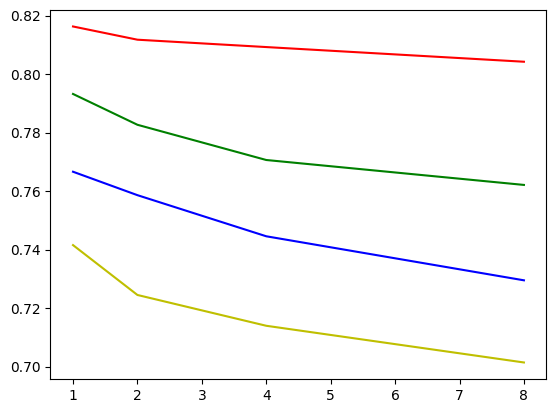

In [ ]:
from sklearn.svm import SVC
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j).fit(initial, Y)
        # Pass an integer for number of folds (e.g., 10)
        scores = cross_val_score(poly_svc,initial,Y, cv=10, scoring='accuracy', n_jobs=10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

In [ ]:
from sklearn.svm import SVC
poly_svc = SVC(C=8, kernel='poly', degree=2).fit(initial, Y)
# Use an integer to specify number of folds for cross-validation
scores = cross_val_score(poly_svc, initial, Y, cv=10, scoring='accuracy')
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(poly_svc, initial, Y, cv=10, scoring='precision')
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(poly_svc, initial, Y, cv=10, scoring='recall')
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 76.21356783919597
Cross validation precision is 82.33190451729901
Cross validation recall is 80.55999999999999


In [ ]:
df=pd.read_csv('/content/communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']

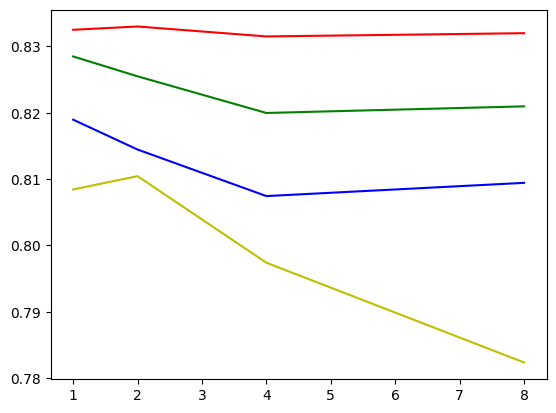

In [ ]:
from sklearn.svm import SVC
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j).fit(New_data, Y)
        # Use keyword arguments for cv, scoring, and n_jobs
        scores = cross_val_score(poly_svc,New_data,Y, cv=10, scoring='accuracy', n_jobs=-1)
        y[j-1].append(np.mean(scores))
    x.append(2**i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

In [ ]:
poly_svc = SVC(C=4, kernel='poly', degree=2).fit(New_data, Y)
# Use an integer to specify the number of folds
scores = cross_val_score(poly_svc, New_data, Y, cv=10, scoring='accuracy', n_jobs=10)
print ('Cross validation accuracy is', np.mean(scores)*100)
# Repeat for precision and recall
scores = cross_val_score(poly_svc, New_data, Y, cv=10, scoring='precision', n_jobs=10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(poly_svc, New_data, Y, cv=10, scoring='recall', n_jobs=10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 81.99597989949747
Cross validation precision is 86.13228157324733
Cross validation recall is 85.05142857142857


average is  0.23798294029101857
Q1(25%) is  0.07
median is  0.15
Q3(75%) is  0.33
average between Q3 and Q1 is  0.2


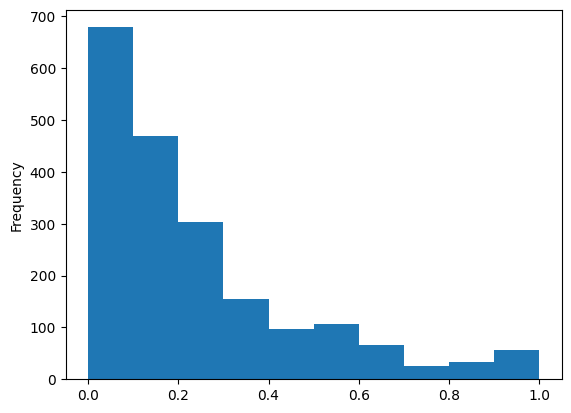

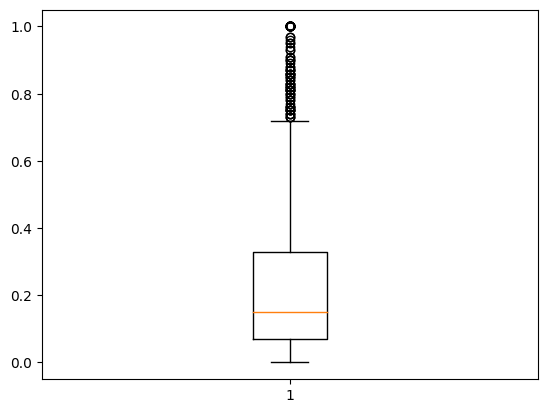

In [ ]:
#New Threshold
df=pd.read_csv('/content/communities-crime-clean.csv')
# df.describe()
df['ViolentCrimesPerPop'].plot.hist()
print('average is ',np.average(df['ViolentCrimesPerPop']))
Q1, median, Q3 = np.percentile(df['ViolentCrimesPerPop'], [25, 50, 75])
print("Q1(25%) is ",Q1)
print("median is ",median)
print("Q3(75%) is ",Q3)
print("average between Q3 and Q1 is ",(Q3+Q1)/2)
plt.show()
plt.boxplot(df['ViolentCrimesPerPop'])
plt.show()

In [ ]:
#New Threshold in DecisionTree
df=pd.read_csv('/content/communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(New_data, Y)
clf
fold=df['fold']
# Pass the number of folds (e.g., 10) as the cv parameter
scores = cross_val_score(clf, New_data, Y, cv=10, scoring='accuracy', n_jobs=10)
print('cross_val_accuracy is ',scores)

print ('Cross validation accuracy is', np.mean(scores)*100)
# Repeat for precision and recall, using keyword arguments
scores = cross_val_score(clf,New_data,Y, cv=10, scoring='precision', n_jobs=10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,New_data,Y, cv=10, scoring='recall', n_jobs=10)
print ('Cross validation recall is', np.mean(scores)*100)

cross_val_accuracy is  [0.785      0.805      0.775      0.785      0.80904523 0.79899497
 0.78894472 0.84422111 0.85427136 0.79396985]
Cross validation accuracy is 80.39447236180904
Cross validation precision is 76.808104867822
Cross validation recall is 74.18209876543209


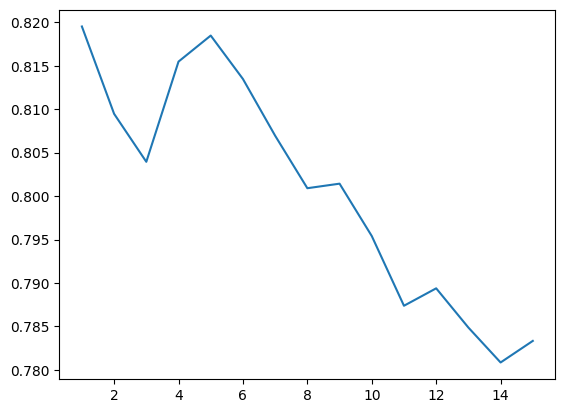

y is  [0.8195125628140703, 0.809464824120603, 0.8039447236180903, 0.8154723618090454, 0.818467336683417, 0.8134723618090453, 0.8069472361809045, 0.8009070351758794, 0.801429648241206, 0.7954070351758795, 0.7873844221105527, 0.7893894472361811, 0.7848768844221106, 0.7808592964824121, 0.7833417085427137]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import tree
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(New_data, Y)
    y_pred = clf.predict(New_data)
    # Pass 'accuracy' as a keyword argument for scoring
    scores = cross_val_score(clf, New_data, Y, scoring='accuracy', cv=10, n_jobs=-1)
    y.append(np.array(scores).mean())
    x.append(i)


plt.plot(x, y)

plt.show()
print('y is ',y)

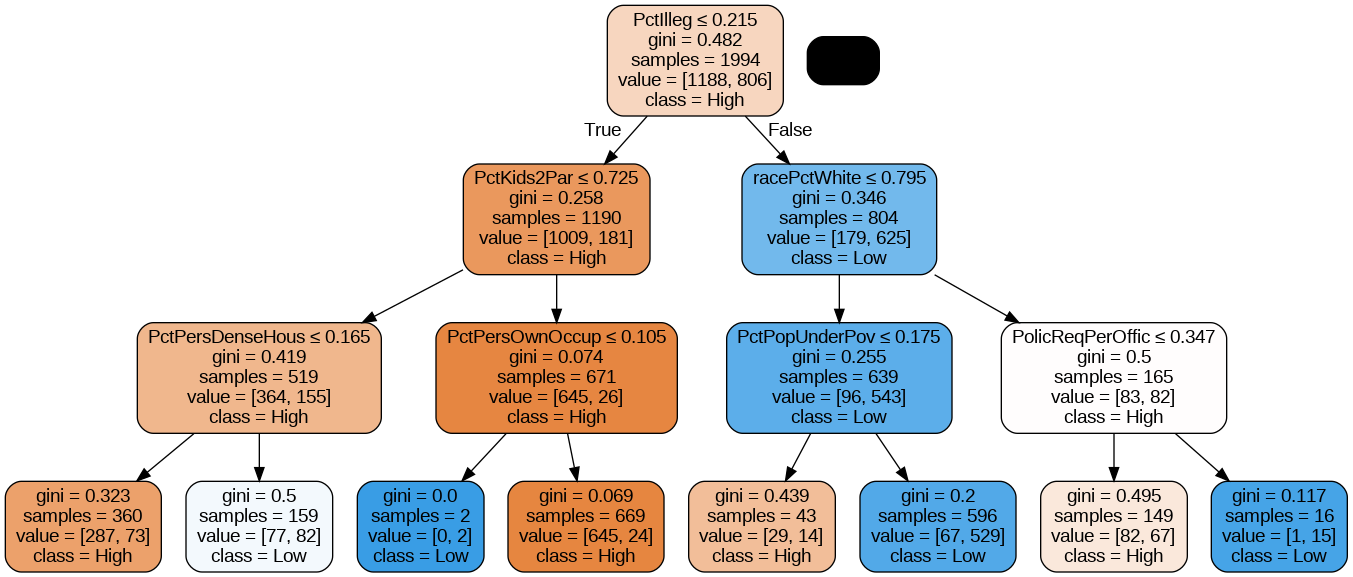

In [ ]:
classname=['High','Low']
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(New_data, Y)
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(New_data),
                         class_names=classname,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

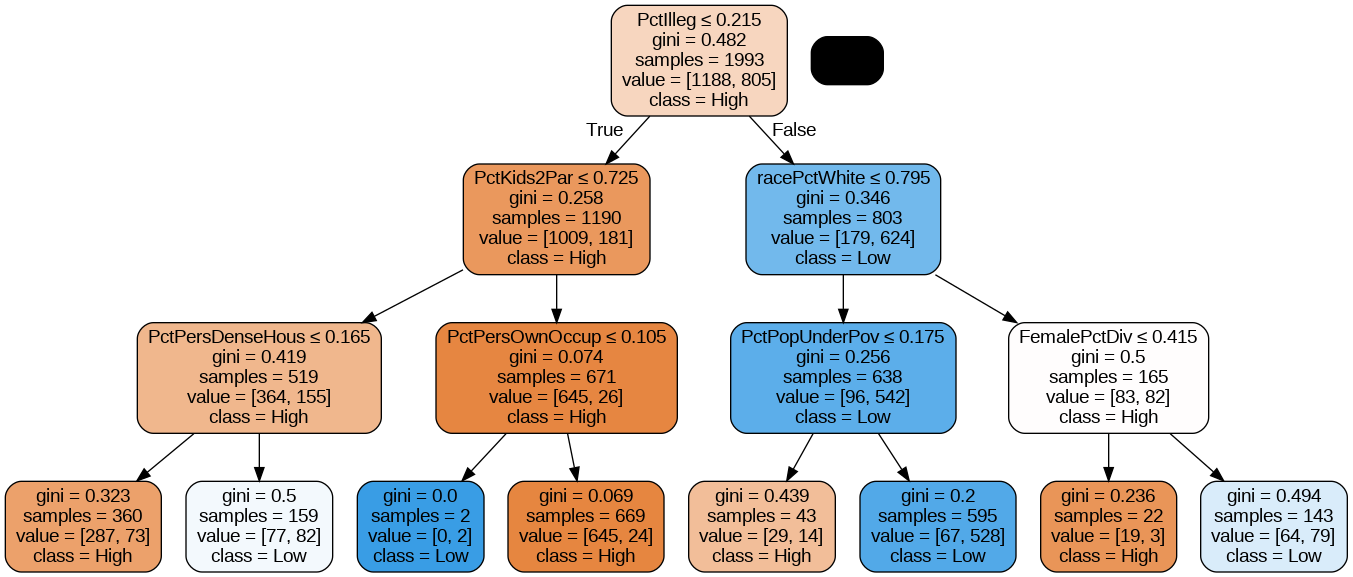

In [ ]:
df=pd.read_csv('/content/communities-crime-clean.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']


clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(initial, Y)
clf
import pydotplus
from IPython.display import Image
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(initial),
                         class_names=classname,
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
# Use KFold for creating cross-validation splits
from sklearn.model_selection import KFold

# Assuming you want 10 folds
fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Now pass the KFold object to cv parameter
scores = cross_val_score(clf, initial, Y, cv=fold, scoring='accuracy')
print('cross_val_accuracy is ',scores)

print ('Cross validation accuracy is', np.mean(scores)*100)
# Repeat for precision and recall, using keyword arguments
scores = cross_val_score(clf,initial,Y, cv=fold, scoring='precision')
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y, cv=fold, scoring='recall')
print ('Cross validation recall is', np.mean(scores)*100)

cross_val_accuracy is  [0.78       0.8        0.805      0.8040201  0.84422111 0.81407035
 0.84924623 0.79396985 0.78894472 0.8040201 ]
Cross validation accuracy is 80.83492462311558
Cross validation precision is 79.77832747407857
Cross validation recall is 70.71927404623483


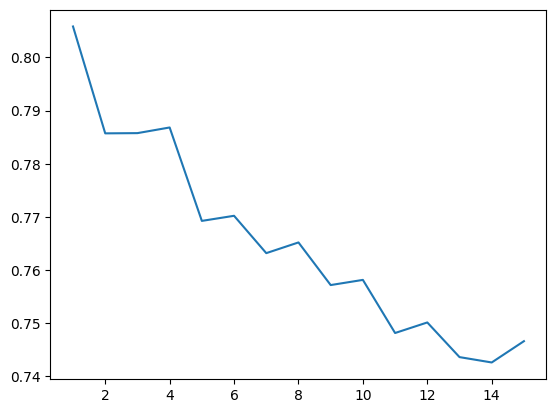

y is  [0.8058190954773868, 0.78571608040201, 0.7857587939698493, 0.7868216080402011, 0.7692512562814071, 0.770211055276382, 0.7631859296482413, 0.7651984924623116, 0.7571809045226131, 0.7581532663316582, 0.7481633165829146, 0.7501482412060302, 0.7436306532663316, 0.7426206030150755, 0.7466281407035177]


In [ ]:
y=[]
x=[]

for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    # Pass 'accuracy' as a keyword argument
    scores = cross_val_score(clf, initial, Y, scoring='accuracy', cv=10)
    y.append(np.array(scores).mean())
    x.append(i)


plt.plot(x, y)

plt.show()
print('y is ',y)

In [ ]:
#New Threshold in Naive Bayes Gaussian
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# Use 'var_' instead of 'sigma_'
variance = gnb.var_
stand_deviation = np.sqrt(variance)
# print('standard deviation is',stand_deviation);
sum_standard = stand_deviation[0] + stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# Use 'theta_' instead of 'theta_'
mean = gnb.theta_
difference = mean[0] - mean[1]
# print('difference is ',abs(difference))
normalized_feature = abs(difference) / sum_standard
print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index = ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])





from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Use KFold for cross-validation
fold = KFold(n_splits=10, shuffle=True, random_state=42)
# Pass the fold and scoring parameters as keyword arguments
scores = cross_val_score(gnb, initial, Y, cv=fold, scoring='accuracy')
print('cross_val_accuracy is ', np.mean(scores) * 100)
scores = cross_val_score(gnb, initial, Y, cv=fold, scoring='precision')
print('cross_val_precision is ', np.mean(scores) * 100)
scores = cross_val_score(gnb, initial, Y, cv=fold, scoring='recall')
print('cross_val_recall is ', np.mean(scores) * 100)

mislabel num is  352
normalized_feature is  [0.33306076 0.03258098 0.57607554 0.72301674 0.04198184 0.35978937
 0.05081276 0.1491096  0.09012258 0.07690147 0.31722709 0.02102557
 0.50499798 0.32275839 0.10399085 0.68789992 0.12525604 0.63770018
 0.08482528 0.52115517 0.39921489 0.24898057 0.33249932 0.11958945
 0.18131628 0.1593845  0.29721696 0.4271772  0.57247427 0.46873416
 0.53762178 0.35764455 0.53696231 0.35122208 0.02515546 0.10257724
 0.31749042 0.37536845 0.57546639 0.2216214  0.65369163 0.63466832
 0.12098212 0.77237886 0.84288241 0.71696935 0.66301396 0.04048604
 0.17378054 0.41761193 0.78896678 0.26418494 0.1721343  0.22136547
 0.25550443 0.30076635 0.22549075 0.24285105 0.24483414 0.25357801
 0.26564133 0.32422931 0.37334747 0.29009904 0.029548   0.13965855
 0.28580806 0.58538383 0.50490824 0.52004923 0.37863295 0.38278532
 0.32275872 0.49473664 0.41475204 0.00776573 0.07533747 0.54894892
 0.33590694 0.22200447 0.19982129 0.17949289 0.26929275 0.26607002
 0.25915258 0.2719

In [ ]:
#New Threshold in LinearSVC
df=pd.read_csv('/content/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
lin_svc = svm.LinearSVC(C=0.014, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i],' feature_weight_is ',feature_weight[i])



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Use KFold for cross-validation, as in your previous examples
fold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lin_svc, initial, Y, cv=fold, scoring='accuracy')
print('cross_val_accuracy is ',scores,' average ',np.mean(scores)*100)
scores = cross_val_score(lin_svc, initial, Y, cv=fold, scoring='precision') # Fix parameter order here
print('cross_val_precision is ',scores,' average ',np.mean(scores)*100)
scores = cross_val_score(lin_svc, initial, Y, cv=fold, scoring='recall') # And here
print('cross_val_recall is ',scores,' average ',np.mean(scores)*100)

select_feature_is  racePctWhite  feature_weight_is  0.6145946052656428
select_feature_is  racePctHisp  feature_weight_is  0.15357666408748835
select_feature_is  pctUrban  feature_weight_is  0.0033860852183207777
select_feature_is  pctWPubAsst  feature_weight_is  0.18829042262399795
select_feature_is  TotalPctDiv  feature_weight_is  0.694753895179924
select_feature_is  PctKids2Par  feature_weight_is  0.6032710102181164
select_feature_is  PctIlleg  feature_weight_is  0.9114540590614224
select_feature_is  PctPersDenseHous  feature_weight_is  0.22739524383409598
select_feature_is  PctHousOccup  feature_weight_is  0.09279379508041782
select_feature_is  PctHousNoPhone  feature_weight_is  0.06273320565648523
select_feature_is  LemasPctOfficDrugUn  feature_weight_is  0.15340079005068982
cross_val_accuracy is  [0.82       0.815      0.8        0.80904523 0.8241206  0.83417085
 0.88442211 0.79396985 0.8241206  0.83417085]  average  82.3902010050251
cross_val_precision is  [0.84285714 0.87301587 

In [ ]:
df=pd.read_csv('/content/communities-crime-full.csv')
# Ensure 'highCrime' is calculated based on the current df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']  # Update Y after calculating 'highCrime'
#fold=df['fold'] # The problem is here, 'fold' should be a way to split data, not the data itself
feature_name=list(New_data)

# Check shapes and adjust if necessary
print("Shape of New_data:", New_data.shape)
print("Shape of Y:", Y.shape)
if New_data.shape[0] != Y.shape[0]:
    # Adjust either New_data or Y to match in number of samples
    # For instance, if Y has an extra row:
    Y = Y[:-1]

lin_svc = svm.LinearSVC(C=0.014, penalty="l1", dual=False).fit(New_data, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i],' feature_weight_is ',feature_weight[i])



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Use KFold for creating cross-validation splits
fold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lin_svc, New_data, Y, cv=fold, scoring='accuracy', n_jobs=10) # Pass cv, scoring, and n_jobs as keyword arguments
print('cross_val_accuracy is ',scores,' average ',np.mean(scores)*100)
scores = cross_val_score(lin_svc, New_data, Y, cv=fold, scoring='precision', n_jobs=10) # Fix here
print('cross_val_precision is ',scores,' average ',np.mean(scores)*100)
scores = cross_val_score(lin_svc, New_data, Y, cv=fold, scoring='recall', n_jobs=10) # And here
print('cross_val_recall is ',scores,' average ',np.mean(scores)*100)

Shape of New_data: (1993, 122)
Shape of Y: (1994,)
select_feature_is  racePctWhite  feature_weight_is  0.6141107625132352
select_feature_is  racePctHisp  feature_weight_is  0.1528645642186868
select_feature_is  pctUrban  feature_weight_is  0.003939558528817614
select_feature_is  pctWPubAsst  feature_weight_is  0.18931610912405628
select_feature_is  TotalPctDiv  feature_weight_is  0.694849313802375
select_feature_is  PctKids2Par  feature_weight_is  0.6039687711899108
select_feature_is  PctIlleg  feature_weight_is  0.9115190308560319
select_feature_is  PctPersDenseHous  feature_weight_is  0.22497042895913974
select_feature_is  PctHousOccup  feature_weight_is  0.09305480267349289
select_feature_is  PctHousNoPhone  feature_weight_is  0.06320923216284176
select_feature_is  LemasPctOfficDrugUn  feature_weight_is  0.14961449536859994
cross_val_accuracy is  [0.85       0.835      0.855      0.84422111 0.81909548 0.81909548
 0.81909548 0.82914573 0.79899497 0.79899497]  average  82.686432160804

In [ ]:
#Extra Credit: Decision Forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
# Specify axis=1 to drop columns
initial = initial.drop('communityname', axis=1)
initial = initial.drop('ViolentCrimesPerPop', axis=1)
initial = initial.drop('fold', axis=1)

initial = initial.drop('state', axis=1)
fold=df['fold']
Y = df['highCrime']
feature_name=list(initial)
clf = RandomForestClassifier(n_estimators=10,max_features='sqrt')
clf = clf.fit(initial, Y)
# dot_data = tree.export_graphviz(clf, out_file=None,
#                          feature_names=list(initial),
#                          class_names='highCrime',
#                          filled=True, rounded=True,
#                          special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [ ]:
y_pred = clf.predict(initial)
feature_importance=clf.feature_importances_
print("feature importance is ",feature_importance)
print ("length feature array",len(feature_importance))
for i in range (0,len(feature_importance)):
    if(feature_importance[i]!=0):
        print("index is ",feature_name[i])

index_max = np.argmax(feature_importance)
print(index_max)

print('coefficient[max] is ',feature_name[index_max])

feature importance is  [0.00453101 0.0052895  0.02741692 0.04312868 0.0066718  0.01489666
 0.00612525 0.00604616 0.00458751 0.00568377 0.00466673 0.00257425
 0.00824932 0.00348964 0.00650642 0.00990383 0.00252441 0.04494595
 0.00658887 0.00362886 0.00280293 0.00450967 0.01109705 0.00535893
 0.00682032 0.00635501 0.01458347 0.00280496 0.00667414 0.00513247
 0.01901212 0.00292736 0.01772965 0.00802226 0.00609317 0.00968379
 0.00766324 0.00543254 0.01681215 0.00730423 0.04663913 0.02113309
 0.00904438 0.04468988 0.03340753 0.01311778 0.01325031 0.00432523
 0.00543336 0.00886471 0.03559314 0.00936133 0.00809632 0.00492618
 0.00651881 0.00727975 0.00443583 0.00646339 0.00526979 0.00211734
 0.00541591 0.0046202  0.00958696 0.01189946 0.0043543  0.00342311
 0.00873238 0.04977253 0.05653061 0.02087156 0.00118794 0.00978694
 0.00402894 0.00551429 0.00499794 0.00704991 0.0085412  0.00657909
 0.00876893 0.001861   0.00242018 0.00487936 0.00683739 0.00342027
 0.00190935 0.00452106 0.00647519 0.003

In [ ]:
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precesion is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 99.35691318327974
Accuracy is 99.19719016557953
Precesion is 99.83844911147011
Recall is 98.88


In [ ]:
!pip install numpy pandas scikit-learn
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# ... (your previous code for loading and preprocessing data)

# Use KFold to create 10 folds for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Add shuffling and random state for better generalization

scores = cross_val_score(clf, initial, Y, cv=kf, scoring='accuracy', n_jobs=10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf, initial, Y, cv=kf, scoring='precision', n_jobs=10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf, initial, Y, cv=kf, scoring='recall', n_jobs=10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 82.08517587939697
Cross validation precision is 86.3825912688307
Cross validation recall is 83.13334102947661
